<a href="https://colab.research.google.com/github/vighc/JsonProcess/blob/main/jsonProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code To Generate JsonData.json file

In [ ]:
import json

transactions = [
    {"transaction_id": "T001", "customer_id": "C001", "product": {"id": "P01", "name": "Laptop", "category": "Electronics", "price": 999.99}, "quantity": 2, "date": "2023-01-15T10:30:00Z", "region": "North"},
    {"transaction_id": "T002", "customer_id": "C002", "product": {"id": "P02", "name": "Mouse", "category": "Accessories", "price": 19.99}, "quantity": 5, "date": "2023-02-10T14:15:00Z", "region": "South"},
    {"transaction_id": "T003", "customer_id": None, "product": {"id": "P01", "name": "Laptop", "category": "Electronics", "price": 999.99}, "quantity": -1, "date": "2023-03-05", "region": "East"},
    {"transaction_id": "T004", "customer_id": "C003", "product": {"id": "P03", "name": "Monitor", "category": "Electronics", "price": 299.50}, "quantity": 3, "date": "2023-04-20T09:00:00Z", "region": "West"},
    {"transaction_id": "T005", "customer_id": "C001", "product": {"id": "P02", "name": "Mouse", "category": "Accessories", "price": 19.99}, "quantity": 10, "date": "2023-05-12", "region": "North"}
]

# Convert to JSON format
json_data = json.dumps(transactions, indent=4)

# Save json_data to JsonData.json file
with open('JsonData.json', 'w') as f:
  f.write(json_data)

## 1. Data Pipeline Development

In [ ]:
import pandas as pd

# Read the JSON file into a pandas DataFrame
df = pd.read_json('/content/JsonData.json')
df

,transaction_id,customer_id,product,quantity,date,region
0,T001,C001,"{'id': 'P01', 'name': 'Laptop', 'category': 'E...",2,2023-01-15T10:30:00Z,North
1,T002,C002,"{'id': 'P02', 'name': 'Mouse', 'category': 'Ac...",5,2023-02-10T14:15:00Z,South
2,T003,None,"{'id': 'P01', 'name': 'Laptop', 'category': 'E...",-1,2023-03-05,East
3,T004,C003,"{'id': 'P03', 'name': 'Monitor', 'category': '...",3,2023-04-20T09:00:00Z,West
4,T005,C001,"{'id': 'P02', 'name': 'Mouse', 'category': 'Ac...",10,2023-05-12,North


In [ ]:
#Flatten the nested product object into columns (e.g., product_id, product_name, category, price).
product_df = pd.json_normalize(df['product'])
product_df = product_df.add_prefix('product_')
df = pd.concat([df.drop(['product'], axis=1), product_df], axis=1)

df

,transaction_id,customer_id,quantity,date,region,product_id,product_name,product_category,product_price
0,T001,C001,2,2023-01-15T10:30:00Z,North,P01,Laptop,Electronics,999.99
1,T002,C002,5,2023-02-10T14:15:00Z,South,P02,Mouse,Accessories,19.99
2,T003,None,-1,2023-03-05,East,P01,Laptop,Electronics,999.99
3,T004,C003,3,2023-04-20T09:00:00Z,West,P03,Monitor,Electronics,299.50
4,T005,C001,10,2023-05-12,North,P02,Mouse,Accessories,19.99


In [ ]:
#Standardize date to a consistent format (e.g., YYYY-MM-DD).
df['date']=pd.to_datetime(df['date'].str[:10])

df

,transaction_id,customer_id,quantity,date,region,product_id,product_name,product_category,product_price
0,T001,C001,2,2023-01-15,North,P01,Laptop,Electronics,999.99
1,T002,C002,5,2023-02-10,South,P02,Mouse,Accessories,19.99
2,T003,None,-1,2023-03-05,East,P01,Laptop,Electronics,999.99
3,T004,C003,3,2023-04-20,West,P03,Monitor,Electronics,299.50
4,T005,C001,10,2023-05-12,North,P02,Mouse,Accessories,19.99


In [ ]:
# Handle Negative Quantity
df['quantity'] = df['quantity'].abs()

df

,transaction_id,customer_id,quantity,date,region,product_id,product_name,product_category,product_price
0,T001,C001,2,2023-01-15,North,P01,Laptop,Electronics,999.99
1,T002,C002,5,2023-02-10,South,P02,Mouse,Accessories,19.99
2,T003,None,1,2023-03-05,East,P01,Laptop,Electronics,999.99
3,T004,C003,3,2023-04-20,West,P03,Monitor,Electronics,299.50
4,T005,C001,10,2023-05-12,North,P02,Mouse,Accessories,19.99


In [ ]:
# Calculate total_value (quantity * price) for each transaction.
df['total_value'] = df['quantity'] * df['product_price']

df

,transaction_id,customer_id,quantity,date,region,product_id,product_name,product_category,product_price,total_value
0,T001,C001,2,2023-01-15,North,P01,Laptop,Electronics,999.99,1999.98
1,T002,C002,5,2023-02-10,South,P02,Mouse,Accessories,19.99,99.95
2,T003,None,1,2023-03-05,East,P01,Laptop,Electronics,999.99,999.99
3,T004,C003,3,2023-04-20,West,P03,Monitor,Electronics,299.50,898.50
4,T005,C001,10,2023-05-12,North,P02,Mouse,Accessories,19.99,199.90


In [ ]:
# Handle null customer_id
df['customer_id'] = df['customer_id'].fillna("Unknown")


df


,transaction_id,customer_id,quantity,date,region,product_id,product_name,product_category,product_price,total_value
0,T001,C001,2,2023-01-15,North,P01,Laptop,Electronics,999.99,1999.98
1,T002,C002,5,2023-02-10,South,P02,Mouse,Accessories,19.99,99.95
2,T003,Unknown,1,2023-03-05,East,P01,Laptop,Electronics,999.99,999.99
3,T004,C003,3,2023-04-20,West,P03,Monitor,Electronics,299.50,898.50
4,T005,C001,10,2023-05-12,North,P02,Mouse,Accessories,19.99,199.90


In [ ]:
# Load the transformed data into a relational database

import sqlite3

conn = sqlite3.connect('sales.db')
df.to_sql('sales', conn, if_exists='replace', index=False, chunksize=2) ##chunksize been used here
conn.close()


In [ ]:
# Query the Table

import sqlite3

def query_db(query):

  try:
    conn = sqlite3.connect('sales.db')
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df
  except Exception as e:
    print(f"Error executing query: {e}")
    return None

##############
query = "SELECT * FROM sales"
result_df = query_db(query)
print(result_df)


  transaction_id customer_id  quantity                 date region product_id  \
0           T001        C001         2  2023-01-15 00:00:00  North        P01   
1           T002        C002         5  2023-02-10 00:00:00  South        P02   
2           T003     Unknown         1  2023-03-05 00:00:00   East        P01   
3           T004        C003         3  2023-04-20 00:00:00   West        P03   
4           T005        C001        10  2023-05-12 00:00:00  North        P02   

  product_name product_category  product_price  total_value  
0       Laptop      Electronics         999.99      1999.98  
1        Mouse      Accessories          19.99        99.95  
2       Laptop      Electronics         999.99       999.99  
3      Monitor      Electronics         299.50       898.50  
4        Mouse      Accessories          19.99       199.90  


## 2. Database Design and Querying

In [ ]:
# Create Normalised Tables

conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

cursor.executescript("""
    CREATE TABLE IF NOT EXISTS customers (
        customer_id TEXT PRIMARY KEY
    );

    CREATE TABLE IF NOT EXISTS products (
        product_id TEXT PRIMARY KEY,
        product_name TEXT NOT NULL,
        product_category TEXT NOT NULL,
        product_price REAL NOT NULL
    );

    CREATE TABLE IF NOT EXISTS transactions (
        transaction_id TEXT PRIMARY KEY,
        customer_id TEXT,
        product_id TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        date TEXT NOT NULL,
        region TEXT NOT NULL,
        total_value REAL NOT NULL,
        FOREIGN KEY (customer_id) REFERENCES customers(customer_id),
        FOREIGN KEY (product_id) REFERENCES products(product_id)
    );
""")

cursor.executescript("""
    CREATE INDEX IF NOT EXISTS idx_transactions_date ON transactions(date);
    CREATE INDEX IF NOT EXISTS idx_transactions_region ON transactions(region);
    CREATE INDEX IF NOT EXISTS idx_transactions_customer ON transactions(customer_id);
    CREATE INDEX IF NOT EXISTS idx_transactions_product ON transactions(product_id);
""")

# Commit and Close
conn.commit()
conn.close()

In [ ]:
# Insert data from Sales table to Normalised Tables
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Insert unique customers
cursor.execute("""
    INSERT OR IGNORE INTO customers (customer_id)
    SELECT DISTINCT customer_id FROM sales WHERE customer_id IS NOT NULL;
""")

# Insert unique products
cursor.execute("""
    INSERT OR IGNORE INTO products (product_id, product_name, product_category, product_price)
    SELECT DISTINCT product_id, product_name, product_category, product_price FROM sales;
""")

# Insert transactions
cursor.execute("""
    INSERT INTO transactions (transaction_id, customer_id, product_id, quantity, date, region, total_value)
    SELECT transaction_id, customer_id, product_id, quantity, date, region, total_value
    FROM sales;
""")

# Commit and Close
conn.commit()
conn.close()

In [ ]:
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# All 3 Queries
queries = {
    "Total Sales by Region": """
        SELECT region, SUM(total_value) AS total_sales
        FROM transactions
        GROUP BY region
        ORDER BY total_sales DESC;
    """,
    "Top 5 Products by Total Sales": """
        SELECT p.product_name, SUM(t.total_value) AS total_sales
        FROM transactions t
        JOIN products p ON t.product_id = p.product_id
        GROUP BY p.product_name
        ORDER BY total_sales DESC
        LIMIT 5;
    """,
    "Monthly Sales Trends": """
        SELECT strftime('%Y-%m', date) AS month, SUM(total_value) AS total_sales
        FROM transactions
        GROUP BY month
        ORDER BY month;
    """
}

# Execute Queries and Display Results
for title, query in queries.items():
    df = pd.read_sql(query, conn)
    print(f"\n🔹 {title} 🔹")
    print(df)

# Close Connection
conn.close()


🔹 Total Sales by Region 🔹
  region  total_sales
0  North      2199.88
1   East       999.99
2   West       898.50
3  South        99.95

🔹 Top 5 Products by Total Sales 🔹
  product_name  total_sales
0       Laptop      2999.97
1      Monitor       898.50
2        Mouse       299.85

🔹 Monthly Sales Trends 🔹
     month  total_sales
0  2023-01      1999.98
1  2023-02        99.95
2  2023-03       999.99
3  2023-04       898.50
4  2023-05       199.90


## 3. Data Quality Checks



1.   Validate JSON data for missing fields - **Already replaced with 'Unknown'**
2.   Handle negative quantity values - **Already Made them Positive (With abs())**

1.   Ensure no duplicate transaction_id entries are loaded - **Implimented transaction_id as Primary Key**
2.   Log anomalies during processing - **A log file will generate during each step.**





## 4. Performance Optimization



1.   Use batch processing to load JSON data into the database - **Already Used chunks while loading to DB**
2.   Optimize one SQL query - **Checkout Monthly Sales Trends Query**

**How Indexing Helps in Monthly Sales Trends Query**
*   Speeds Up Date Filtering (WHERE date >= ...)
*   Optimizes GROUP BY on Month (strftime('%Y-%m', date))
*   Faster Sorting (ORDER BY month)











## 5. Data Visualization with Power BI - I didnt work on BI

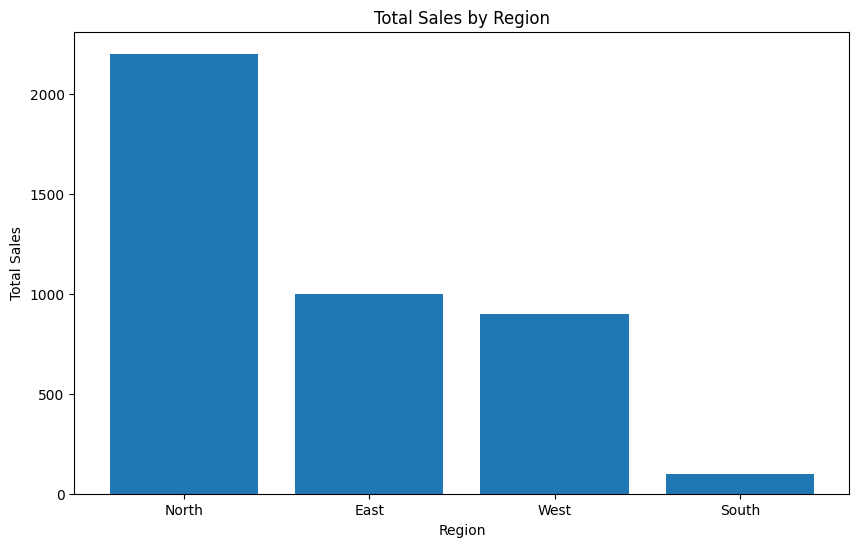

In [ ]:
# prompt: Bar chart: Total sales by region. pick from queries.items():

import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Assuming 'df' is the DataFrame with the query results
df_total_sales_by_region = pd.read_sql(queries["Total Sales by Region"], conn)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_total_sales_by_region['region'], df_total_sales_by_region['total_sales'])
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.show()

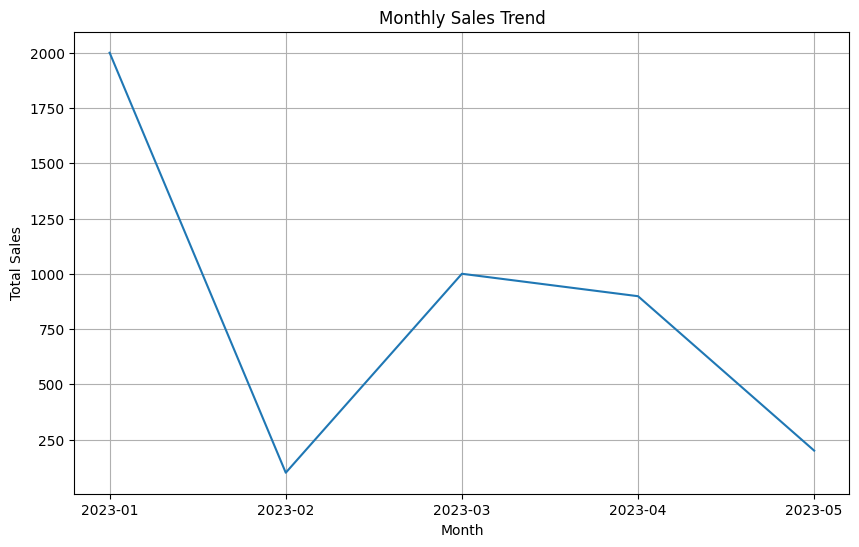

In [ ]:
# prompt: Line chart: Monthly sales trend (using date).

import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Assuming 'df' is the DataFrame with the query results
df_monthly_sales_trends = pd.read_sql(queries["Monthly Sales Trends"], conn)

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_sales_trends['month'], df_monthly_sales_trends['total_sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

In [ ]:
# prompt: Table: Top 5 products by total_value. from queries["Top 5 Products by Total Sales"]

import pandas as pd
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

df_top_5_products = pd.read_sql(queries["Top 5 Products by Total Sales"], conn)

print(df_top_5_products)

conn.close()

  product_name  total_sales
0       Laptop      2999.97
1      Monitor       898.50
2        Mouse       299.85
